NAME: ANN MARIYA VAZHAPPILLY NICLAVOS
STUDENT ID: VAZ22608613
DATE: 27/08/2024
Description: This script is used for predicting the length of hospital stay using Machine learning model and Deep learning.

Importing Necessary Libraries

In [2]:
# Importing necessary libraries and modules for data processing, model building, and evaluation

# pandas: Used for data manipulation and analysis, particularly for reading, organizing, and processing datasets.
import pandas as pd

# numpy: Provides support for large multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays.
import numpy as np

# train_test_split: A function from sklearn used to split the dataset into training and testing sets, ensuring that the model is evaluated on unseen data.
from sklearn.model_selection import train_test_split

# OneHotEncoder: Transforms categorical features into a format that can be provided to ML algorithms to improve model performance.
# StandardScaler: Scales numerical features to have a mean of 0 and a standard deviation of 1, which is essential for many ML algorithms.
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# ColumnTransformer: Allows for different preprocessing steps to be applied to different subsets of features in a dataset.
from sklearn.compose import ColumnTransformer

# Pipeline: Facilitates the assembly of several steps (such as preprocessing and model training) into a single workflow.
from sklearn.pipeline import Pipeline

# matplotlib.pyplot: A plotting library for creating static, animated, and interactive visualizations in Python.
import matplotlib.pyplot as plt

# seaborn: A data visualization library based on matplotlib, providing a high-level interface for drawing attractive and informative statistical graphics.
import seaborn as sns

# RandomForestRegressor: An ensemble learning method for regression that operates by constructing multiple decision trees and outputting the mean prediction of the individual trees.
from sklearn.ensemble import RandomForestRegressor

# mean_squared_error: A metric used to measure the average of the squares of the errors between predicted and actual values, commonly used to evaluate the performance of regression models.
from sklearn.metrics import mean_squared_error

# Sequential: A linear stack of layers that allows for the creation and training of neural network models in Keras.
from tensorflow.keras.models import Sequential

# Adam: An optimization algorithm that updates network weights iteratively based on training data, widely used for training deep learning models.
from tensorflow.keras.optimizers import Adam

# Dense, Dropout, Input: Core layers used in neural networks.
# - Dense: A fully connected neural network layer.
# - Dropout: A regularization technique where randomly selected neurons are ignored during training to prevent overfitting.
# - Input: Defines the input layer to a model.
from tensorflow.keras.layers import Dense, Dropout, Input

# EarlyStopping: Stops training when a monitored metric has stopped improving to prevent overfitting.
# ReduceLROnPlateau: Reduces the learning rate when a metric has stopped improving, which can help in fine-tuning the model.
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# GridSearchCV: Performs exhaustive search over a specified parameter grid to optimize model hyperparameters.
# RandomizedSearchCV: Similar to GridSearchCV but samples a fixed number of hyperparameter combinations, making it more efficient for large grids.
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# joblib: A library for saving and loading Python objects, particularly useful for saving trained machine learning models to disk.
import joblib

# load_model: Loads a previously saved Keras model from disk for further use or evaluation.
from tensorflow.keras.models import load_model


Loading and Cleaning the Dataset

In [3]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Msc Project/diabetic_data_new_subset_500.csv')

# Drop rows with missing target
df_cleaned = df.dropna(subset=['time_in_hospital'])
df_cleaned = df_cleaned.drop(columns=['max_glu_serum', 'A1Cresult'])

Data Inspection

In [4]:
# Inspect the data
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              500 non-null    int64 
 1   patient_nbr               500 non-null    int64 
 2   race                      500 non-null    object
 3   gender                    500 non-null    object
 4   age                       500 non-null    object
 5   weight                    500 non-null    object
 6   admission_type_id         500 non-null    int64 
 7   discharge_disposition_id  500 non-null    int64 
 8   admission_source_id       500 non-null    int64 
 9   time_in_hospital          500 non-null    int64 
 10  payer_code                500 non-null    object
 11  medical_specialty         500 non-null    object
 12  num_lab_procedures        500 non-null    int64 
 13  num_procedures            500 non-null    int64 
 14  num_medications           

Feature Selection and Splitting Data

In [5]:
# Select relevant features and target variable
features = [
    'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
    'num_lab_procedures', 'num_medications', 'number_diagnoses',
    'race', 'gender', 'age', 'diag_1', 'diag_2', 'diag_3'
]
target = 'time_in_hospital'

# Split data into features and target
X = df_cleaned[features]
y = df_cleaned[target]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Data Preprocessing

In [6]:
# Preprocessing pipelines for numeric and categorical data
numeric_features = ['num_lab_procedures', 'num_medications', 'number_diagnoses']
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

categorical_features = [
    'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
    'race', 'gender', 'age', 'diag_1', 'diag_2', 'diag_3'
]
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

Data Visualization

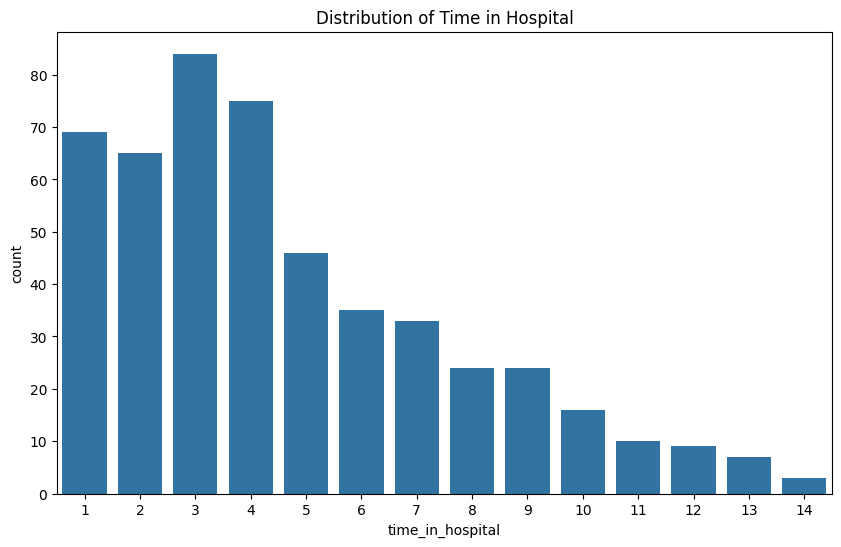

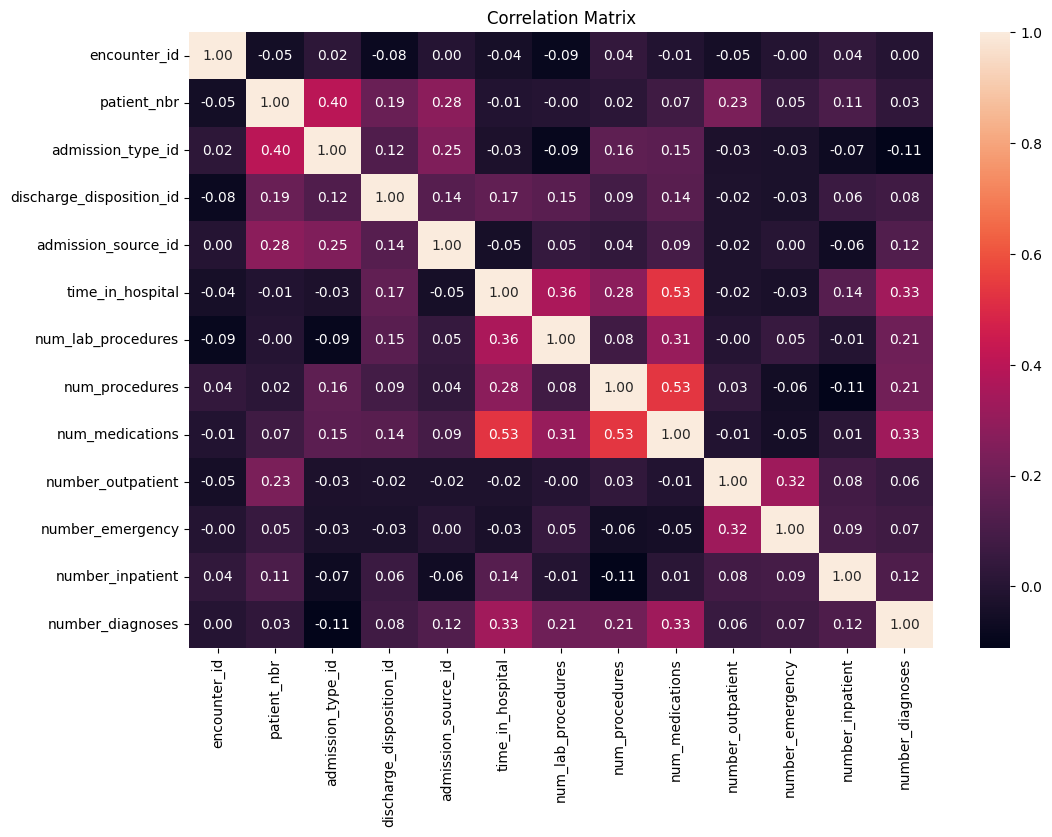

In [7]:
# Distribution of the target variable
plt.figure(figsize=(10, 6))
sns.countplot(x='time_in_hospital', data=df_cleaned)
plt.title('Distribution of Time in Hospital')
plt.show()

# Correlation heatmap to see relationships between numerical features
plt.figure(figsize=(12, 8))
numerical_df = df_cleaned.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numerical_df.corr(), annot=True, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Modeling with Random Forest

In [8]:
# Define a Random Forest model pipeline
rf_model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor(random_state=42))])

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Predict and evaluate the Random Forest model
y_pred_rf = rf_model.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f"Random Forest RMSE: {rmse_rf}")

Random Forest RMSE: 2.779563095164418


Neural Network Model

In [9]:
# Preprocessing pipelines for numeric and categorical data
numeric_features = ['num_lab_procedures', 'num_medications', 'number_diagnoses']
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

categorical_features = [
    'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
    'race', 'gender', 'age', 'diag_1', 'diag_2', 'diag_3'
]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # Ensure dense output
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Prepare data for the neural network
X_train_nn = preprocessor.fit_transform(X_train)
X_test_nn = preprocessor.transform(X_test)

# Define a Neural Network model with improvements
def build_nn_model(input_dim):
    model = Sequential()
    model.add(Input(shape=(input_dim,)))
    model.add(Dense(128, activation='relu', kernel_regularizer='l2'))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu', kernel_regularizer='l2'))
    model.add(Dense(32, activation='relu', kernel_regularizer='l2'))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.0005), loss='mse')
    return model

# Build and train the neural network
nn_model = build_nn_model(X_train_nn.shape[1])

# Define callbacks: EarlyStopping and ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Train the model with the callbacks
history = nn_model.fit(X_train_nn, y_train, validation_data=(X_test_nn, y_test),
                       epochs=100, batch_size=32,
                       callbacks=[early_stopping, lr_scheduler])


Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 32.9022 - val_loss: 33.8042 - learning_rate: 5.0000e-04
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 29.0821 - val_loss: 27.8816 - learning_rate: 5.0000e-04
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 22.3293 - val_loss: 19.7846 - learning_rate: 5.0000e-04
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 14.1635 - val_loss: 12.3749 - learning_rate: 5.0000e-04
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10.8753 - val_loss: 10.1573 - learning_rate: 5.0000e-04
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.6228 - val_loss: 9.8243 - learning_rate: 5.0000e-04
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.4358 - val_loss: 9.6660 - learning_rate: 5.0000e-04
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.3651 - val_loss: 9.2034 - learning_rate: 5.0000e-04
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.2413 - val_loss: 9.1809 

Visualizing Neural Network Training History

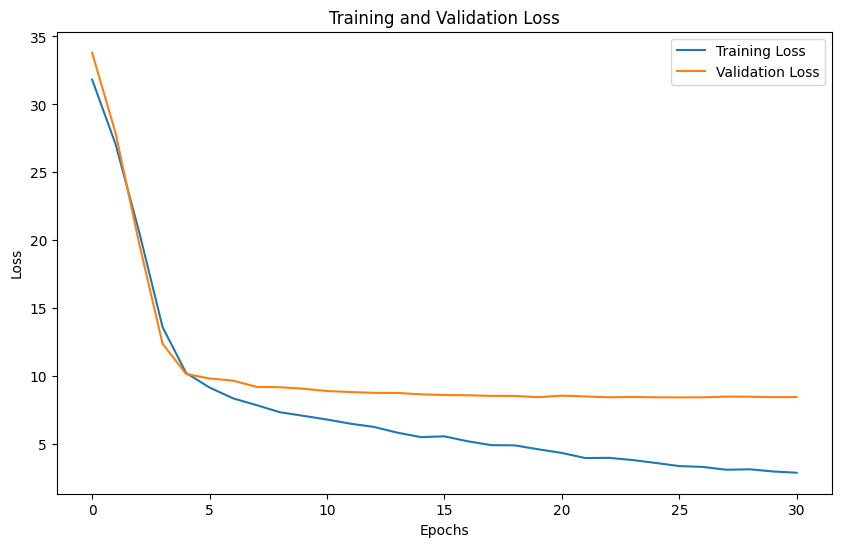

In [10]:
# Visualize training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Evaluating Neural Network Performance

In [11]:
# Evaluate the final model on the test set
y_pred_nn = nn_model.predict(X_test_nn)
rmse_nn = np.sqrt(mean_squared_error(y_test, y_pred_nn))
print(f"Final Neural Network RMSE: {rmse_nn}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Final Neural Network RMSE: 2.586096504714539


Hyperparameter Tuning with GridSearchCV

In [12]:
# Example: Hyperparameter tuning for Random Forest
param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [10, 20, None],
}
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and model performance
print(f"Best parameters: {grid_search.best_params_}")
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)
rmse_best_rf = np.sqrt(mean_squared_error(y_test, y_pred_best_rf))
print(f"Tuned Random Forest RMSE: {rmse_best_rf}")

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best parameters: {'regressor__max_depth': 10, 'regressor__n_estimators': 200}
Tuned Random Forest RMSE: 2.727052071629755


Hyperparameter Tuning with RandomizedSearchCV

In [13]:
# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [10, 20, None],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4],
    'regressor__max_features': ['sqrt', 'log2', None]
}

# Running RandomizedSearchCV
random_search = RandomizedSearchCV(rf_model, param_grid, cv=5,
                                   scoring='neg_mean_squared_error',
                                   n_jobs=-1, n_iter=50, random_state=42)
random_search.fit(X_train, y_train)

# Best parameters and model performance
print(f"Best parameters: {random_search.best_params_}")
best_rf_model = random_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)
rmse_best_rf = np.sqrt(mean_squared_error(y_test, y_pred_best_rf))
print(f"Tuned Random Forest RMSE: {rmse_best_rf}")

Best parameters: {'regressor__n_estimators': 300, 'regressor__min_samples_split': 2, 'regressor__min_samples_leaf': 1, 'regressor__max_features': 'sqrt', 'regressor__max_depth': None}
Tuned Random Forest RMSE: 2.7079128083780275


Saving and Loading Models

In [14]:
# Save the Random Forest model using joblib
joblib.dump(best_rf_model, 'best_rf_model.pkl')

# Save the best Random Forest model pipeline using joblib
joblib.dump(best_rf_model, 'best_rf_pipeline.pkl')

# Save the trained neural network model
nn_model.save('nn_model.keras')

# Load the saved models
loaded_rf_model = joblib.load('best_rf_pipeline.pkl')
loaded_nn_model = load_model('nn_model.keras')
loaded_nn_model.compile(optimizer='adam', loss='mse')

Final Evaluation of Loaded Models

In [15]:
# Calculate and display final RMSE for both models
final_rmse_rf = np.sqrt(mean_squared_error(y_test, loaded_rf_model.predict(X_test)))
final_rmse_nn = np.sqrt(mean_squared_error(y_test, loaded_nn_model.predict(X_test_nn)))

print(f"Final Random Forest RMSE: {final_rmse_rf}")
print(f"Final Neural Network RMSE: {final_rmse_nn}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Final Random Forest RMSE: 2.7079128083780275
Final Neural Network RMSE: 2.586096504714539


Making Predictions on New Data

In [16]:
# Predict on new data
new_data = X_test.iloc[:5]  # Example new data
new_data_preprocessed = preprocessor.transform(new_data)
rf_predictions = loaded_rf_model.predict(new_data)
nn_predictions = loaded_nn_model.predict(new_data_preprocessed)

print("Random Forest Predictions:", rf_predictions)
print("Neural Network Predictions:", nn_predictions)

# Example new data (one row, with consistent lengths)
new_data = pd.DataFrame({
    'admission_type_id': [1],
    'discharge_disposition_id': [1],
    'admission_source_id': [7],
    'num_lab_procedures': [33],
    'num_medications': [8],
    'number_diagnoses': [8],
    'race': ['Caucasian'],
    'gender': ['Female'],
    'age': ['[40-50)'],
    'diag_1': ['311'],
    'diag_2': ['309'],
    'diag_3': ['493']
})

# Preprocess the new data
new_data_preprocessed = preprocessor.transform(new_data)

# Predict using the loaded Random Forest model
rf_predictions = loaded_rf_model.predict(new_data)

# Predict using the loaded Neural Network model
nn_predictions = loaded_nn_model.predict(new_data_preprocessed)

# Round the predictions to the nearest whole number
rf_predictions_rounded = np.round(rf_predictions)
nn_predictions_rounded = np.round(nn_predictions)

# Display the rounded predictions
print("Rounded Random Forest Predictions (Days in Hospital):", rf_predictions_rounded)
print("Rounded Neural Network Predictions (Days in Hospital):", nn_predictions_rounded)

combined_prediction = np.round((rf_predictions_rounded + nn_predictions_rounded) / 2)
print("Combined Prediction (Days in Hospital):", combined_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Random Forest Predictions: [5.23333333 3.83       2.62333333 3.37       3.72333333]
Neural Network Predictions: [[5.675599 ]
 [4.9104557]
 [1.8290187]
 [4.4350505]
 [4.178866 ]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Rounded Random Forest Predictions (Days in Hospital): [3.]
Rounded Neural Network Predictions (Days in Hospital): [[3.]]
Combined Prediction (Days in Hospital): [[3.]]


Summary of Model Performance

In [17]:
# Summarize model performance
print("Summary of Model Performance:")
print(f"Random Forest Model RMSE: {final_rmse_rf}")
print(f"Neural Network Model RMSE: {final_rmse_nn}")

Summary of Model Performance:
Random Forest Model RMSE: 2.7079128083780275
Neural Network Model RMSE: 2.586096504714539
